 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set Path for whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")

# Reading whale returns as dataframe
whale_returns_df = pd.read_csv(whale_returns_path, index_col = 'Date', parse_dates = True)
whale_returns_df.sort_index(inplace = True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Set Path for algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")

# Reading algorithmic returns as dataframe
algo_returns_df = pd.read_csv(algo_returns_path, index_col = "Date", parse_dates = True)
algo_returns_df.sort_index(inplace = True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Set Path for S&P TSX 60
sp_tsx_path = Path("./Resources/sp_tsx_history.csv")

# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col = "Date", parse_dates = True)
sp_tsx_df.sort_index(inplace = True)

sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Remove '$' and ',' from the Closing Prices
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "", regex = True)
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "", regex = True)

# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

In [11]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_df.pct_change()

In [13]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()

sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns = {"Close":"S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_returns], axis = "columns", join = "inner")

In [17]:
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Combined Portfolios and S&P TSX 60'}, xlabel='Date'>

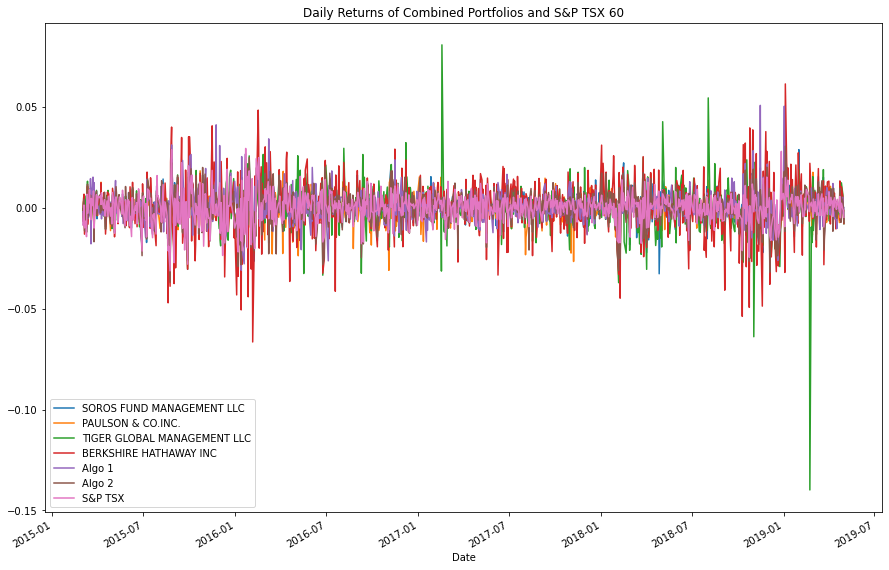

In [18]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (15,10), title = "Daily Returns of Combined Portfolios and S&P TSX 60")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Combined Portfolios and S&P TSX 60'}, xlabel='Date'>

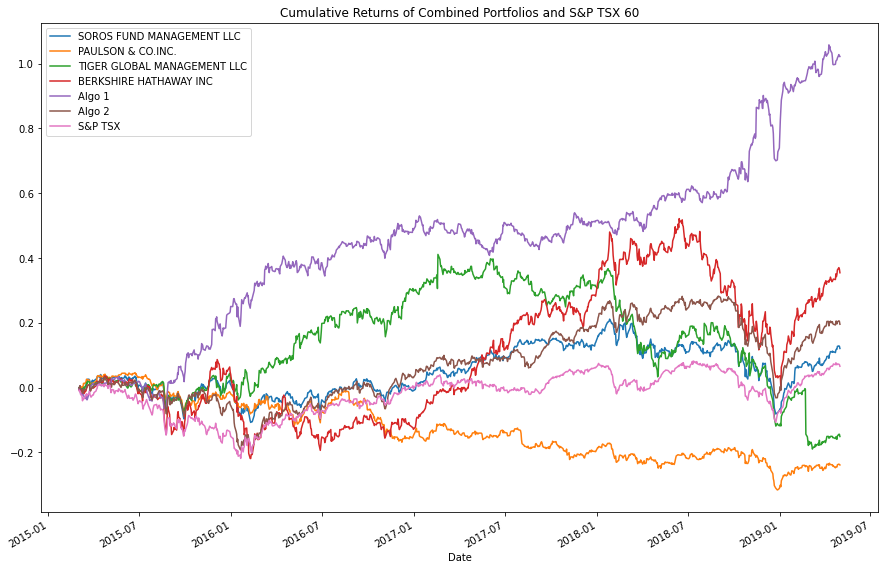

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize = (15,10), title = "Cumulative Returns of Combined Portfolios and S&P TSX 60")

### Do any of the portfolios outperform the S&P TSX 60?

Soros Fund Management LLC, Algorithm 2, Berkshire Hathaway Inc and Algorithm 1 outperform the S&P TSX 60

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

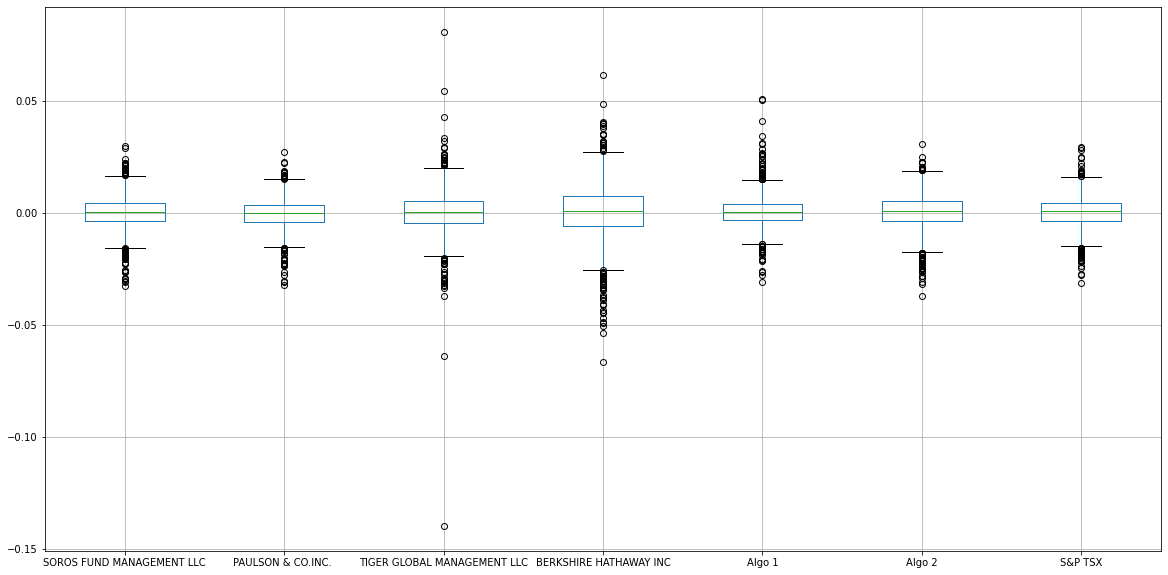

In [20]:
# Box plot to visually show risk
combined_returns.boxplot(figsize = (20, 10))


### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = combined_returns.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"The daily standard deviation of S&P TSX 60 is {portfolio_std['S&P TSX']:6f}.")

# Determine which portfolios are riskier than the S&P TSX 60
print(portfolio_std.sort_values(ascending = False))


The daily standard deviation of S&P TSX 60 is 0.007034.
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

Berkshire Hathaway Inc, Tiger Global Management LLC, Algorithm 2, Soros Fund Management LLC and Algorithm 1 have a higher risk than the S&P TSX 60

### Calculate the Annualised Standard Deviation

In [23]:
# Calculate the annualised standard deviation (252 trading days)
annualised_std = combined_returns.std() * np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Combined Portfolios and S&P TSX 60'}, xlabel='Date'>

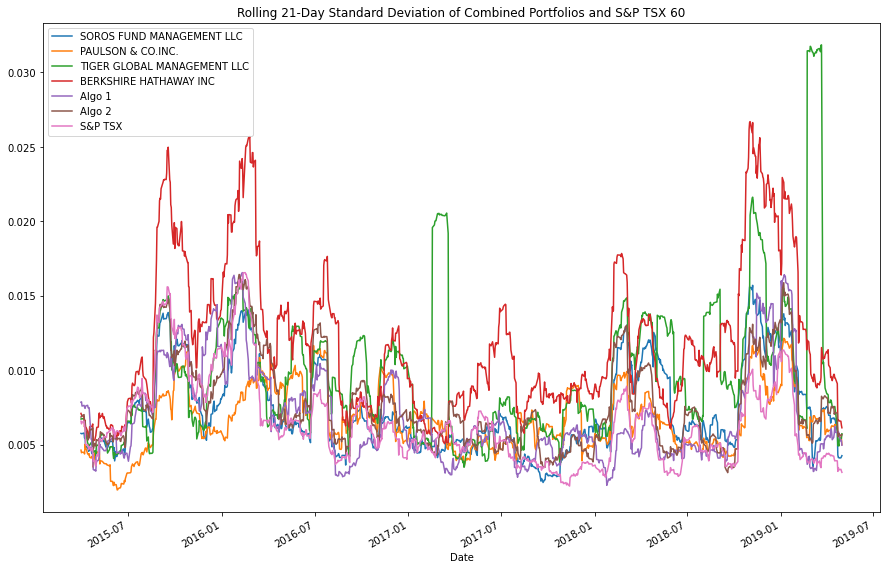

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined_std = combined_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling_combined_std.plot(figsize = (15,10), title = "Rolling 21-Day Standard Deviation of Combined Portfolios and S&P TSX 60")

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
combined_correlation = combined_returns.corr()

# Display the correlation matrix
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

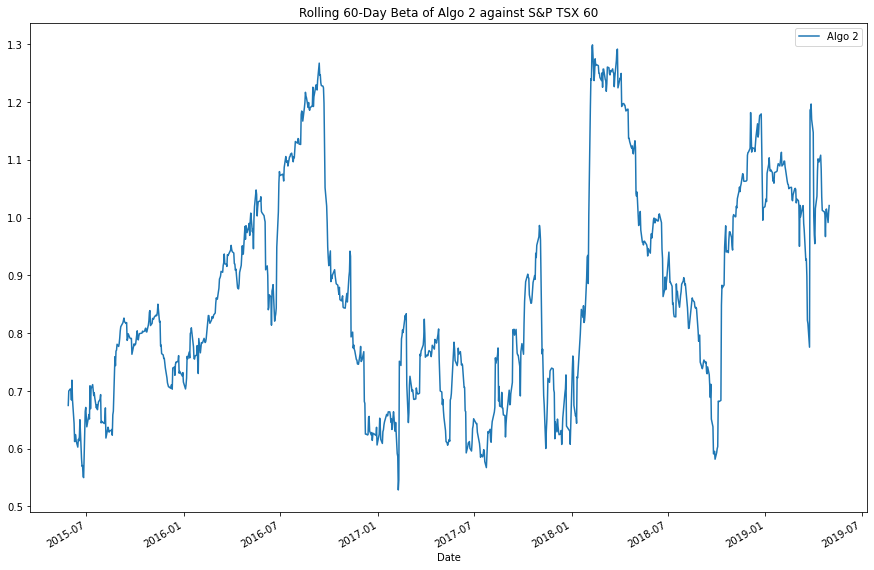

In [26]:
# Calculate covariance of a single portfolio
algo2_covariance = combined_returns["Algo 2"].cov(combined_returns["S&P TSX"])

# Calculate variance of S&P TSX

sp_tsx_variance = combined_returns["S&P TSX"].var()

# Computing beta

algo2_beta = algo2_covariance / sp_tsx_variance

# Computing 60-Day beta

rolling_algo2_covariance = combined_returns["Algo 2"].rolling(window=60).cov(combined_returns["S&P TSX"])

rolling_sp_tsx_variance = combined_returns["S&P TSX"].rolling(window = 60).var()

rolling_algo2_beta = rolling_algo2_covariance / rolling_sp_tsx_variance

# Plot 60-Day beta trend
algo2_plot = rolling_algo2_beta.plot(figsize = (15,10), title = "Rolling 60-Day Beta of Algo 2 against S&P TSX 60")
algo2_plot.legend(["Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average with 21-Day Half-Life of Combined Portfolios and S&P TSX 60'}, xlabel='Date'>

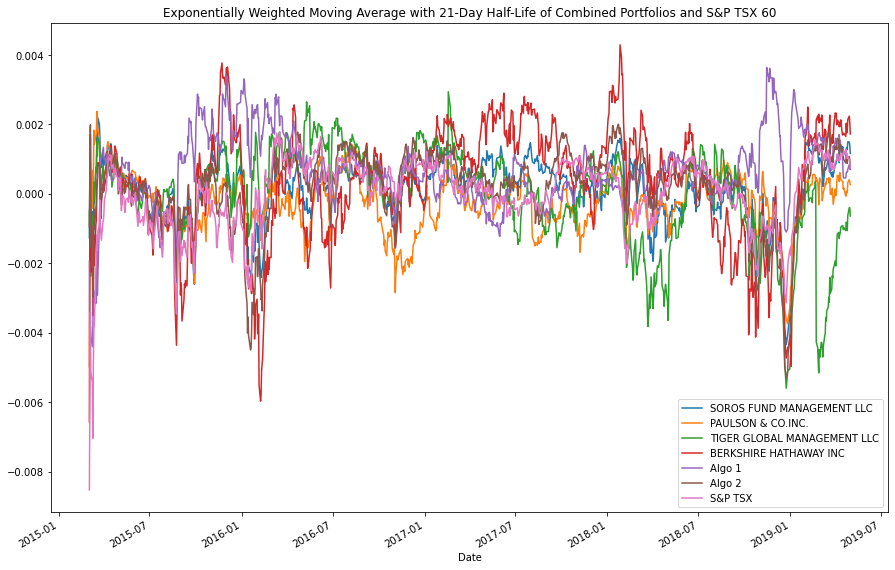

In [27]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(halflife = 21).mean()
combined_returns_ewm.plot(figsize = (15,10), title = "Exponentially Weighted Moving Average with 21-Day Half-Life of Combined Portfolios and S&P TSX 60")

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
combined_sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Combined Portfolios and S&P TSX 60 Sharpe Ratios'}>

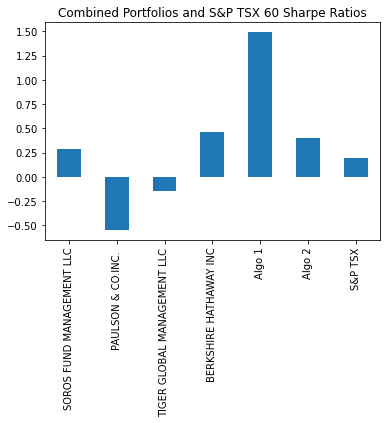

In [29]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = "bar", title = "Combined Portfolios and S&P TSX 60 Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algorithm 1 has outperformed all other portfolios with the highest sharpe ratio. While algorithm 2 was outperformed by just the Berkshire Hathaway Inc portfolio.


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.


In [30]:
# Reading data from 1st stock
# Set Path for ATVI
atvi_path = Path("./Resources/atvi_historical.csv")

# Reading ATVI as dataframe
atvi_df = pd.read_csv(atvi_path, index_col = "Date", parse_dates = True)
atvi_df.head()

,Close
Date,
2018-01-02,64.31
2018-01-03,65.31
2018-01-04,64.66
2018-01-05,66.37
2018-01-08,66.63


In [31]:
# Check data types
atvi_df.dtypes

Close    float64
dtype: object

In [32]:
# Calculate daily returns for ATVI closing prices
atvi_returns = atvi_df.pct_change()

# Drop nulls
atvi_returns = atvi_returns.dropna()

# Change column name to "ATVI"
atvi_returns = atvi_returns.rename(columns = {"Close":"ATVI"})
atvi_returns.head()

,ATVI
Date,
2018-01-03,0.015550
2018-01-04,-0.009953
2018-01-05,0.026446
2018-01-08,0.003917
2018-01-09,-0.006604


In [33]:
# Reading data from 2nd stock
# Set Path for EA
ea_path = Path("./Resources/ea_historical.csv")

# Reading EA as dataframe
ea_df = pd.read_csv(ea_path, index_col = "Date", parse_dates = True)
ea_df.head()

,Close
Date,
2018-01-02,109.45
2018-01-03,109.75
2018-01-04,107.19
2018-01-05,112.39
2018-01-08,113.22


In [34]:
# Check data types
ea_df.dtypes

Close    float64
dtype: object

In [35]:
# Calculate daily returns for EA closing prices
ea_returns = ea_df.pct_change()

# Drop nulls
ea_returns = ea_returns.dropna()

# Change column name to "EA"
ea_returns = ea_returns.rename(columns = {"Close":"EA"})
ea_returns.head()

,EA
Date,
2018-01-03,0.002741
2018-01-04,-0.023326
2018-01-05,0.048512
2018-01-08,0.007385
2018-01-09,-0.009186


In [36]:
# Reading data from 3rd stock
# Set Path for TTWO
ttwo_path = Path("./Resources/ttwo_historical.csv")

# Reading TTWO as dataframe
ttwo_df = pd.read_csv(ttwo_path, index_col = "Date", parse_dates = True)
ttwo_df.head()

,Close
Date,
2018-01-02,112.88
2018-01-03,113.88
2018-01-04,114.02
2018-01-05,116.91
2018-01-08,117.37


In [37]:
# Check data types
ttwo_df.dtypes

Close    float64
dtype: object

In [38]:
# Calculate daily returns for TTWO closing prices
ttwo_returns = ttwo_df.pct_change()

# Drop nulls
ttwo_returns = ttwo_returns.dropna()

# Change column name to "TTWO"
ttwo_returns = ttwo_returns.rename(columns = {"Close":"TTWO"})
ttwo_returns.head()

,TTWO
Date,
2018-01-03,0.008859
2018-01-04,0.001229
2018-01-05,0.025346
2018-01-08,0.003935
2018-01-09,-0.020959


In [39]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([atvi_returns, ea_returns, ttwo_returns], axis = "columns", join = "inner")

In [40]:
# Display sample data
custom_portfolio.head()

,ATVI,EA,TTWO
Date,,,
2018-01-03,0.015550,0.002741,0.008859
2018-01-04,-0.009953,-0.023326,0.001229
2018-01-05,0.026446,0.048512,0.025346
2018-01-08,0.003917,0.007385,0.003935
2018-01-09,-0.006604,-0.009186,-0.020959


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2018-01-03    0.009050
2018-01-04   -0.010683
2018-01-05    0.033435
2018-01-08    0.005079
2018-01-09   -0.012250
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat([whale_returns_df, algo_returns_df, custom_portfolio_returns, sp_tsx_returns], axis = "columns", join = "inner")
combined_portfolio_returns.rename(columns={0:"Custom Portfolio"}, inplace = True)
combined_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom Portfolio,S&P TSX
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.009050,0.003774
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.010683,0.002528
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.033435,-0.003869
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.005079,-0.001944
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,-0.012250,0.000097


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
annualised_portfolio_std = combined_portfolio_returns.std() * np.sqrt(252)
annualised_portfolio_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
Custom Portfolio               0.343644
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Combined Portfolios and S&P TSX 60'}, xlabel='Date'>

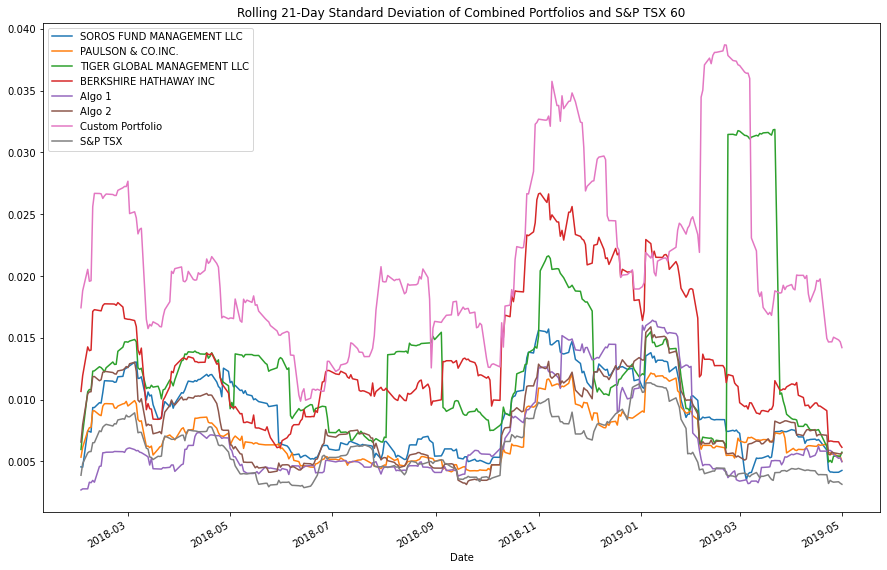

In [49]:
# Calculate rolling standard deviation
rolling_portfolio_std = combined_portfolio_returns.rolling(window = 21).std()

# Plot rolling standard deviation
rolling_portfolio_std.plot(figsize = (15,10), title = "Rolling 21-Day Standard Deviation of Combined Portfolios and S&P TSX 60")

### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
portfolio_correlation = combined_portfolio_returns.corr()

portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom Portfolio,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.574201,0.686681
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.446411,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.329229,0.438781
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.624683,0.649817
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.229134,0.284789
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.530727,0.754326
Custom Portfolio,0.574201,0.446411,0.329229,0.624683,0.229134,0.530727,1.000000,0.413463
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,0.413463,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio against S&P TSX 60'}, xlabel='Date'>

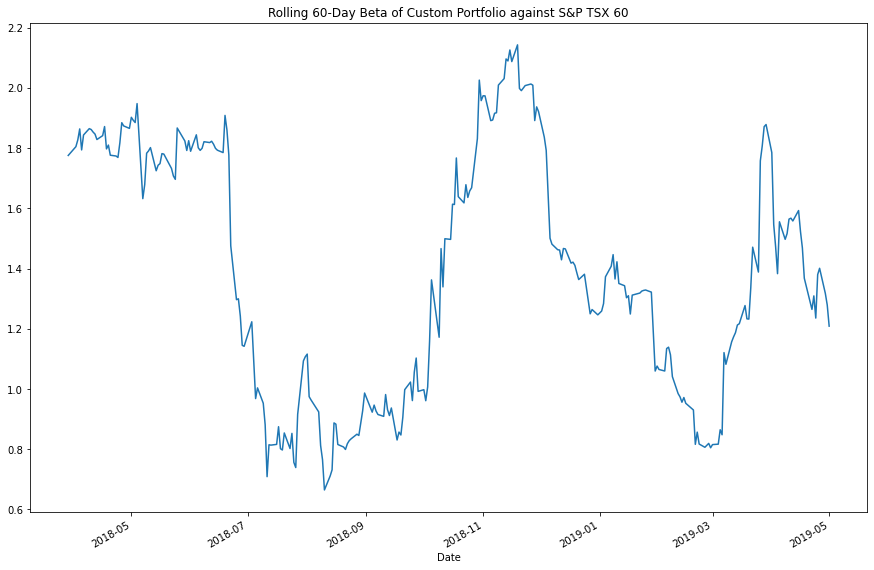

In [51]:
# Calculate and plot Beta
rolling_custom_covariance = combined_portfolio_returns["Custom Portfolio"].rolling(window=60).cov(combined_returns["S&P TSX"])

rolling_custom_beta = rolling_custom_covariance / rolling_sp_tsx_variance

rolling_custom_beta.plot(figsize = (15, 10), title = "Rolling 60-Day Beta of Custom Portfolio against S&P TSX 60")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualised Sharpe Ratios
portfolio_sharpe_ratios = (combined_portfolio_returns.mean() * 252) / (combined_portfolio_returns.std() * np.sqrt(252))
portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
Custom Portfolio              -0.258807
S&P TSX                        0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Combined Portfolios and S&P TSX 60'}>

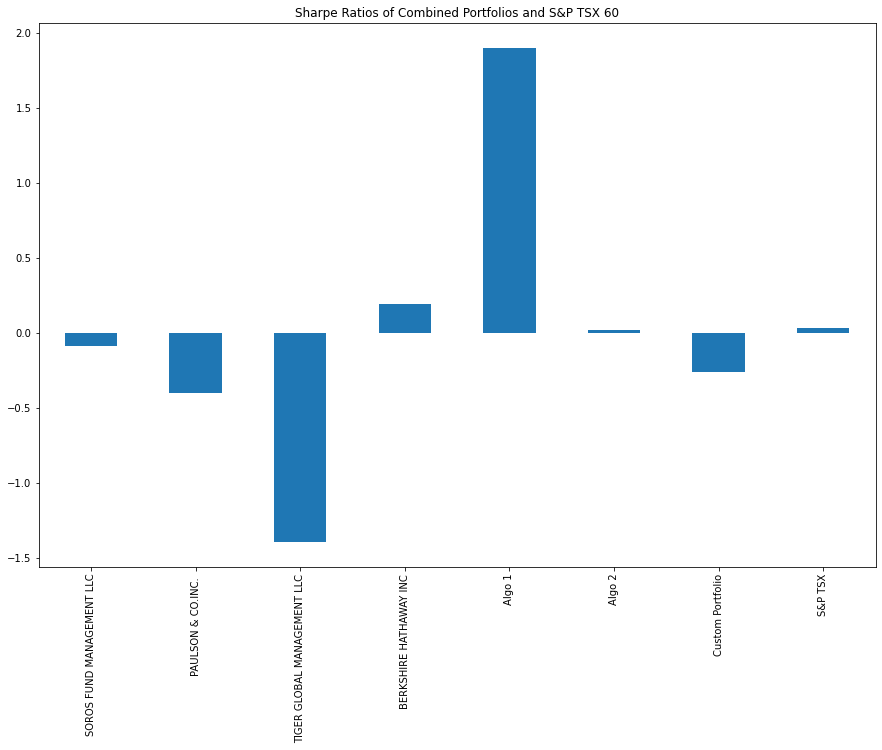

In [53]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind = "bar", figsize = (15,10), title = "Sharpe Ratios of Combined Portfolios and S&P TSX 60")

### How does your portfolio do?

My custom portfolio underperforms when compared to the in-house trading algorithms and the S&P TSX 60 as it has a lower sharpe ratio. However, the custom portfolio has performed better than the whale portfolio.